# Visualizing linear relationships
https://seaborn.pydata.org/tutorial/regression.html

In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(0)

In [12]:
tips = sns.load_dataset("tips")
tips.tail(2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## Functions to draw linear regression models

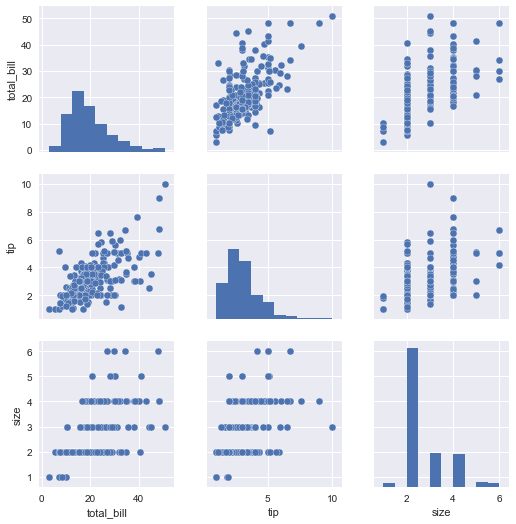

In [5]:
sns.pairplot(tips)

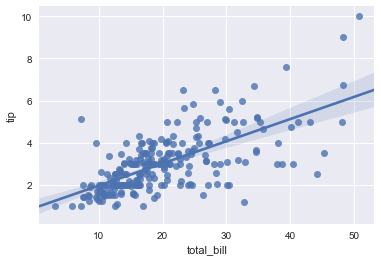

In [6]:
sns.regplot(x="total_bill", y="tip", data=tips);

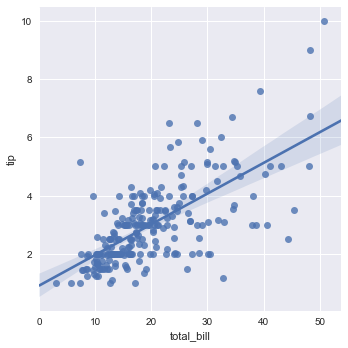

In [7]:
sns.lmplot(x="total_bill", y="tip", data=tips);

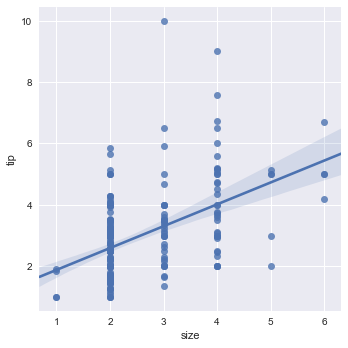

In [8]:
sns.lmplot(x="size", y="tip", data=tips);

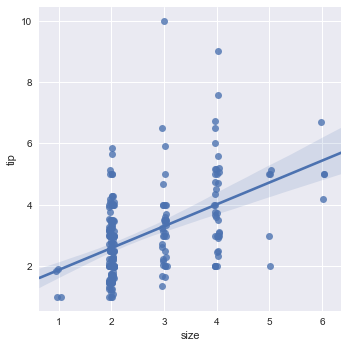

In [9]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

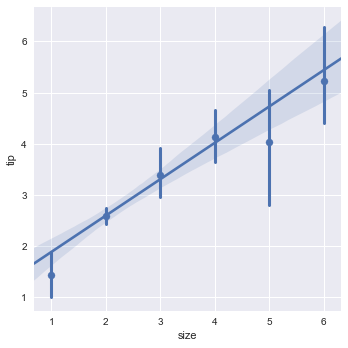

In [10]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

## Fitting different kinds of models

In [11]:
anscombe = sns.load_dataset("anscombe")
anscombe.tail(2)

,dataset,x,y
42,IV,8.0,7.91
43,IV,8.0,6.89


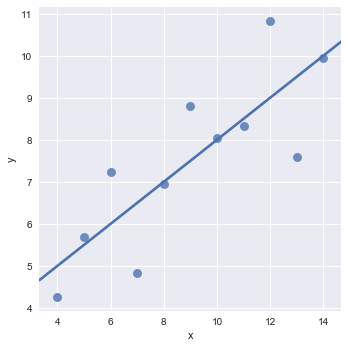

In [13]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

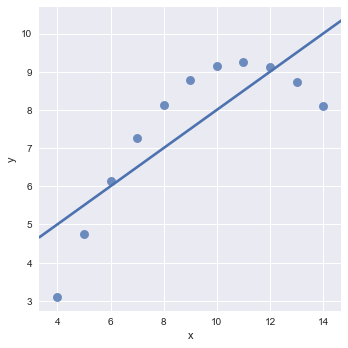

In [15]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

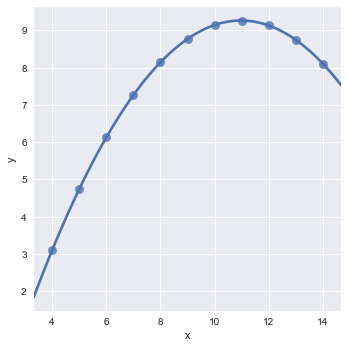

In [16]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80},
           order=2);

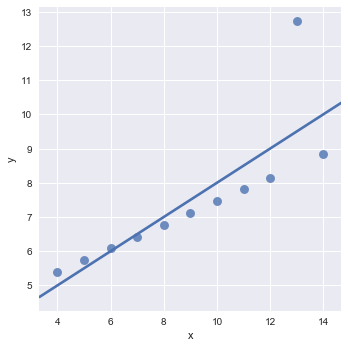

In [17]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

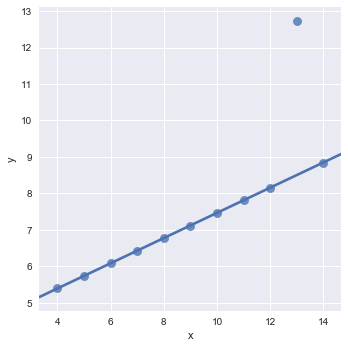

In [18]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80},
           robust=True);

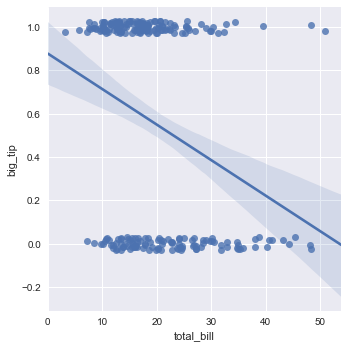

In [19]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15

sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

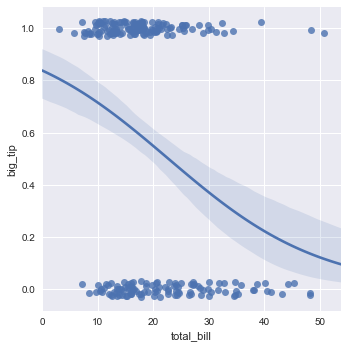

In [21]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03,
           logistic=True);

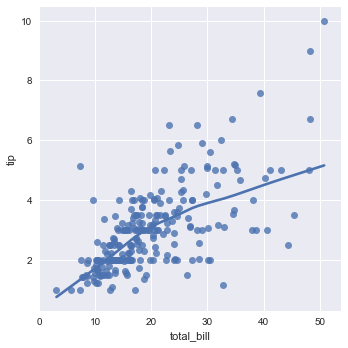

In [24]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

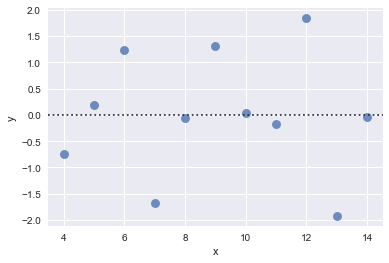

In [25]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

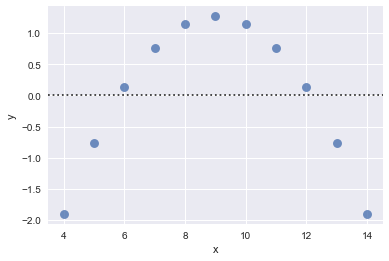

In [26]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

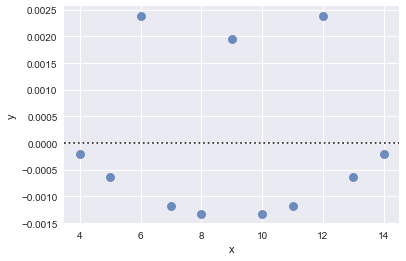

In [30]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80}, 
              order = 2);

## Conditioning on other variables

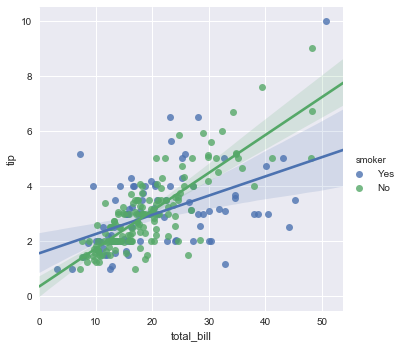

In [31]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

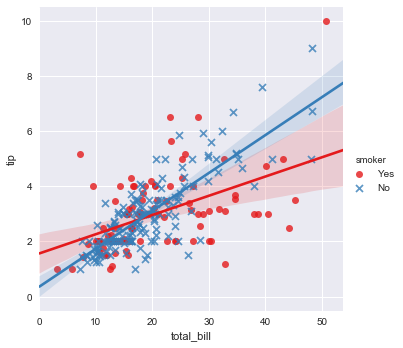

In [32]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

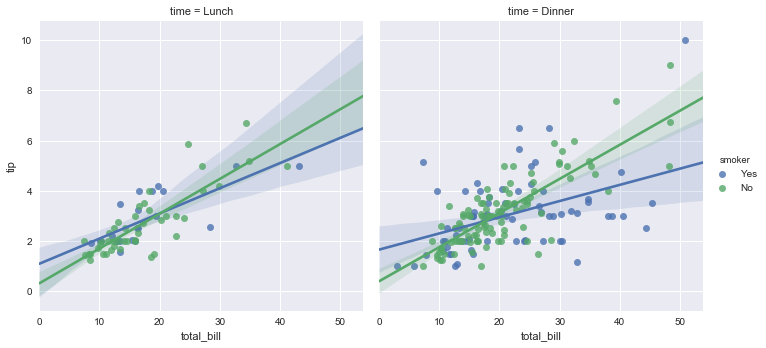

In [33]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           col="time");

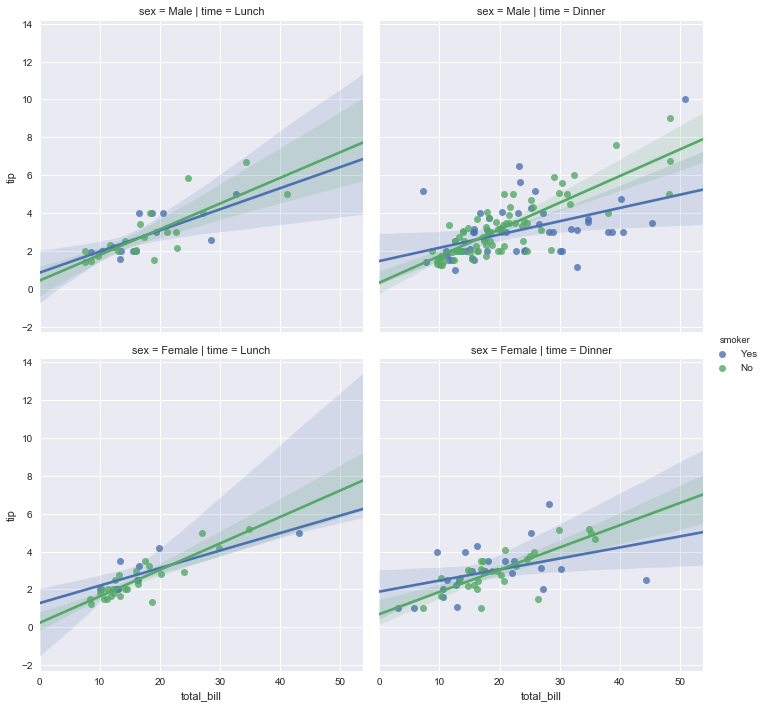

In [36]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           row="sex", col="time");

## Controlling the size and shape of the plot

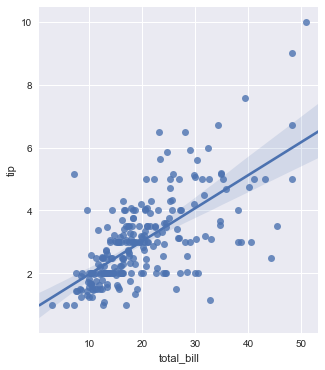

In [37]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

In contrast, the size and shape of the lmplot() figure is controlled through the FacetGrid interface using the size and aspect parameters, which apply to each facet in the plot, not to the overall figure itself:

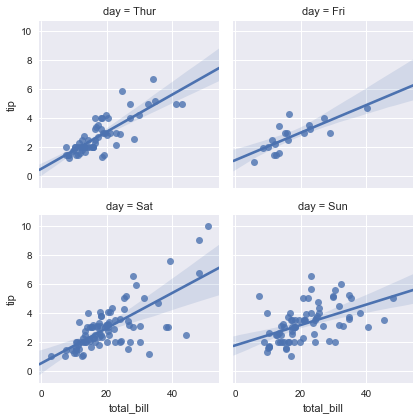

In [42]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3);

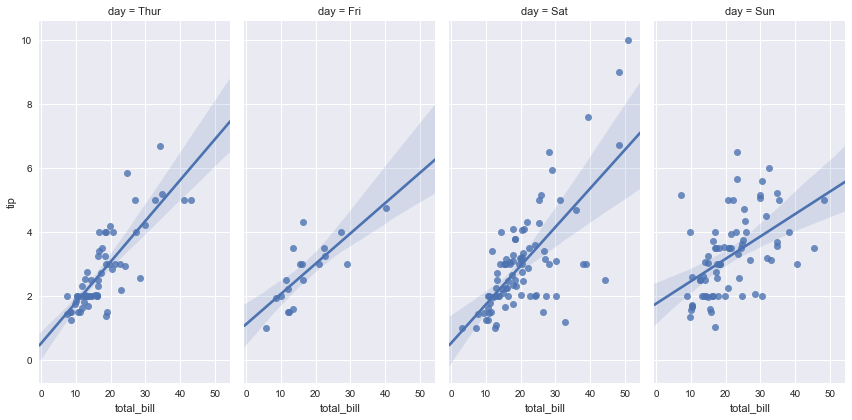

In [53]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           size=6, aspect=.5);

## Plotting a regression in other contexts

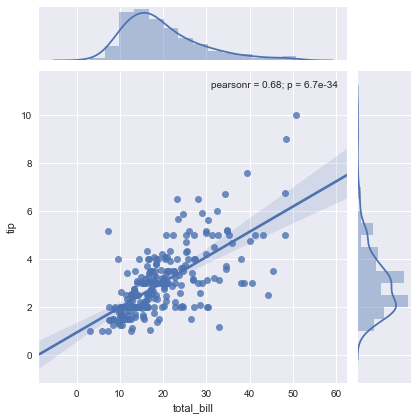

In [54]:
sns.jointplot(x="total_bill", y="tip", data=tips,
              kind="reg");

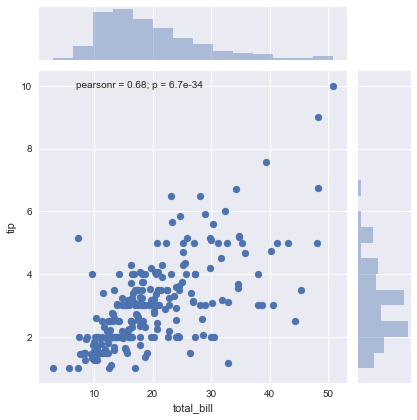

In [56]:
sns.jointplot(x="total_bill", y="tip", data=tips);

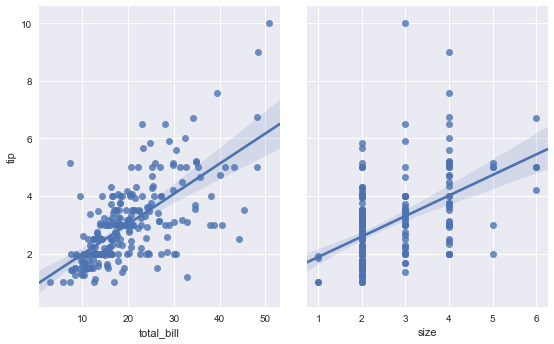

In [55]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, 
             kind="reg");

Using the pairplot() function with kind="reg" combines regplot() and PairGrid to show the linear relationship between variables in a dataset. Take care to note how this is different from lmplot(). In the figure below, the two axes don’t show the same relationship conditioned on two levels of a third variable; rather, PairGrid() is used to show multiple relationships between different pairings of the variables in a dataset:

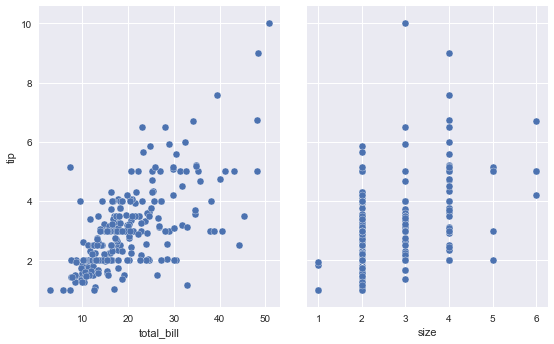

In [57]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8);

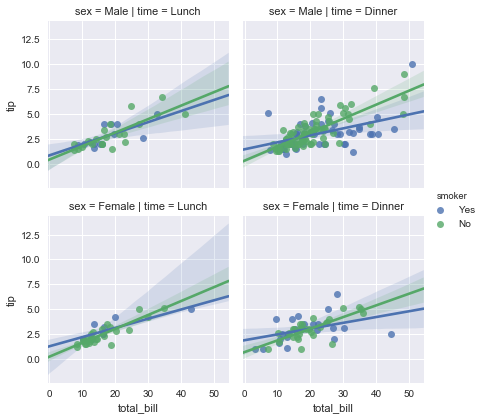

In [70]:
sns.lmplot(data = tips, x="total_bill", y="tip",
           size = 3,
           hue="smoker", 
           row="sex", col="time");

Like lmplot(), but unlike jointplot(), conditioning on an additional categorical variable is built into pairplot() using the hue parameter:

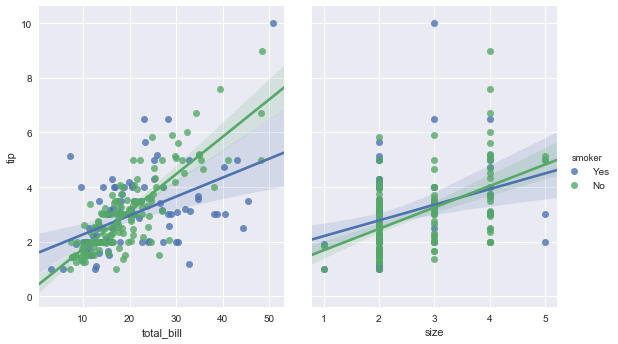

In [71]:
sns.pairplot(data=tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg",
             hue="smoker");